<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/KNN_IRIS_norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IRIS-KNN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

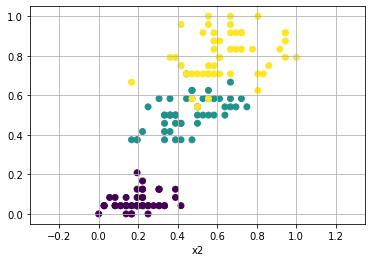

In [ ]:
# load iris data
x = load_iris().data[:,[0,3]]
y = load_iris().target

minmax = MinMaxScaler()
minmax.fit(x)
xn = minmax.transform(x)


fig, axs = plt.subplots(1,1)
axs.scatter(xn[:,0], xn[:,1], c=y)
#axs.set_aspect('equal', 'box')
axs.axis('equal')
plt.grid()
plt.xlabel('x1')
plt.xlabel('x2')
plt.show()

xtrain, xtest, ytrain, ytest = train_test_split(xn,y, stratify=y, test_size=0.30, random_state=42)

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(xtrain, ytrain)
print(knn.effective_metric_)

#Predict the response for test dataset
y_pred = knn.predict(xtest)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(ytest, y_pred))


euclidean
Accuracy: 0.9111111111111111


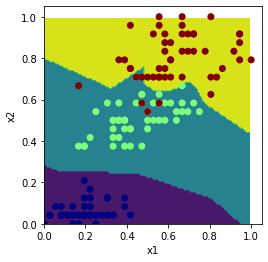

In [ ]:
# plot decision boundary
x1 = np.arange(xn[:,0].min()-0, xn[:,0].max()+0, 0.01)
x2 = np.arange(xn[:,1].min()-0, xn[:,1].max()+0, 0.01)
x1g, x2g = np.meshgrid(x1, x2)
z = knn.predict(np.array([x1g.flatten(), x2g.flatten()]).T)

fig, axs = plt.subplots(1,1)
axs.contourf(x1g, x2g, z.reshape(x1g.shape))

#plot the scatter plot of the dataset
axs.scatter(xn[:,0],xn[:,1], c=y, cmap=cm.jet)
plt.xlabel('x1')
plt.ylabel('x2')
#axs.axis('equal')
axs.set_aspect('equal', 'box')
plt.show()